<a href="https://colab.research.google.com/github/bsshreesha/Python-SQL-Assignment/blob/main/EDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### For python tutorials kindly use the link provided: [Python](https://github.com/bsshreesha/Python-SQL-Assignment/blob/main/Python.ipynb)

### For NumPy tutorials kindly use the link provided: [Introduction to Numpy](https://github.com/bsshreesha/Python-SQL-Assignment/blob/main/Introduction_to_NumPy.ipynb)

### For Matplotlib tutorials kindly use the link provided: [Introduction to Matplotlib](https://github.com/bsshreesha/Python-SQL-Assignment/blob/main/Introduction_to_Matplotlib.ipynb)

# Exploratory Data Analysis (EDA)

Exploratory Data Analysis (EDA) is a critical step in the data analysis process. It involves using statistical techniques and visualization methods to understand the structure, patterns, and relationships in a dataset. EDA helps in identifying outliers, understanding the distribution of variables, and uncovering insights that can guide further analysis.

## Key Steps in EDA

### 1. Data Collection
Gather the data from various sources such as databases, APIs, or files (CSV, Excel, etc.).

### 2. Data Cleaning
Handle missing values, remove duplicates, and correct inconsistencies in the data.

### 3. Descriptive Statistics
Summarize the main characteristics of the data using measures such as mean, median, mode, standard deviation, and variance.

### 4. Data Visualization
Create visual representations of the data to identify patterns and relationships. Common visualizations include:

- **Histograms**: To understand the distribution of a single variable.
- **Box Plots**: To identify outliers and understand the spread of the data.
- **Scatter Plots**: To explore relationships between two variables.
- **Bar Charts**: To compare quantities across different categories.
- **Heatmaps**: To visualize correlations between multiple variables.

### 5. Hypothesis Testing
Formulate and test hypotheses about the data using statistical methods.

### 6. Feature Engineering
Create new features or transform existing ones to better capture the underlying patterns in the data.

## Example Workflow

Here is a simple example of an EDA workflow using Python and Pandas:

```python
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
df = pd.read_csv('data.csv')

# Display the first few rows of the dataset
print(df.head())

# Summary statistics
print(df.describe())

# Check for missing values
print(df.isnull().sum())

# Visualize the distribution of a variable
plt.hist(df['age'], bins=10)
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.title('Distribution of Age')
plt.show()

# Box plot to identify outliers
sns.boxplot(x=df['age'])
plt.title('Box Plot of Age')
plt.show()

# Scatter plot to explore relationships
plt.scatter(df['age'], df['income'])
plt.xlabel('Age')
plt.ylabel('Income')
plt.title('Age vs Income')
plt.show()

# Correlation heatmap
corr_matrix = df.corr()
sns.heatmap(corr_matrix, annot=True)
plt.title('Correlation Heatmap')
plt.show()
```

In [ ]:
# Import required libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, f1_score, classification_report

# Step 1: Load and Clean the Dataset

We begin by:
- Importing required libraries
- Loading the dataset
- Cleaning data: renaming columns and checking for nulls
- Creating a new target variable `pass_fail` based on average scores
- Encoding categorical features


In [ ]:
# Step 1: Load the dataset
df = pd.read_csv('StudentsPerformance.csv')
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [ ]:
# Data Cleaning
# Check for null values
print("Null values in the dataset:\n", df.isnull().sum())

Null values in the dataset:
 gender                         0
race/ethnicity                 0
parental level of education    0
lunch                          0
test preparation course        0
math score                     0
reading score                  0
writing score                  0
dtype: int64


In [ ]:
# Rename columns for simplicity
df.columns = [col.strip().lower().replace(" ", "_") for col in df.columns]

This line cleans and standardizes column names by:

- Removing extra spaces and converting names to lowercase.

- Replacing spaces with underscores for easier access in code.

In [ ]:
# Add a "pass/fail" target based on average score
df["average_score"] = df[["math_score", "reading_score", "writing_score"]].mean(axis=1)
df["pass_fail"] = df["average_score"].apply(lambda x: 1 if x >= 40 else 0)  # 1 = Pass, 0 = Fail
df.head()

,gender,race/ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score,average_score,pass_fail
0,female,group B,bachelor's degree,standard,none,72,72,74,72.666667,1
1,female,group C,some college,standard,completed,69,90,88,82.333333,1
2,female,group B,master's degree,standard,none,90,95,93,92.666667,1
3,male,group A,associate's degree,free/reduced,none,47,57,44,49.333333,1
4,male,group C,some college,standard,none,76,78,75,76.333333,1


In [ ]:
# Encode categorical variables
label_encoders = {}
for column in df.select_dtypes(include='object').columns:
    le = LabelEncoder()
    df[column] = le.fit_transform(df[column])
    label_encoders[column] = le

df.head()

,gender,race/ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score,average_score,pass_fail
0,0,1,1,1,1,72,72,74,72.666667,1
1,0,2,4,1,0,69,90,88,82.333333,1
2,0,1,3,1,1,90,95,93,92.666667,1
3,1,0,0,0,1,47,57,44,49.333333,1
4,1,2,4,1,1,76,78,75,76.333333,1


## A note on Encoder:

`LabelEncoder` is a tool that converts categories into integers.

```python
for column in df.select_dtypes(include='object').columns:
```
This loop automatically picks all columns that have data type "object", which usually means they contain text/categorical data.

```python
    le = LabelEncoder()
```

Creates a new instance of LabelEncoder from scikit-learn.
```python
    df[column] = le.fit_transform(df[column])
```
This does two things:

- .fit() figures out all the unique labels in the column.

- .transform() maps each label to a unique number (e.g., "female" → 0, "male" → 1).

Then it replaces the original column in the DataFrame with the new numeric values.

```python
    label_encoders[column] = le
```
Store that encoder in the `label_encoders` dictionary using the column name as a key.

If reversal of the encoding is required,
```python
label_encoders["gender"].inverse_transform([0, 1])
```


# Step 2: Exploratory Data Analysis (EDA)

In this step:
- We visualize the distribution of pass/fail outcomes
- Create pairplots of student scores
- Analyze correlation between all numeric variables


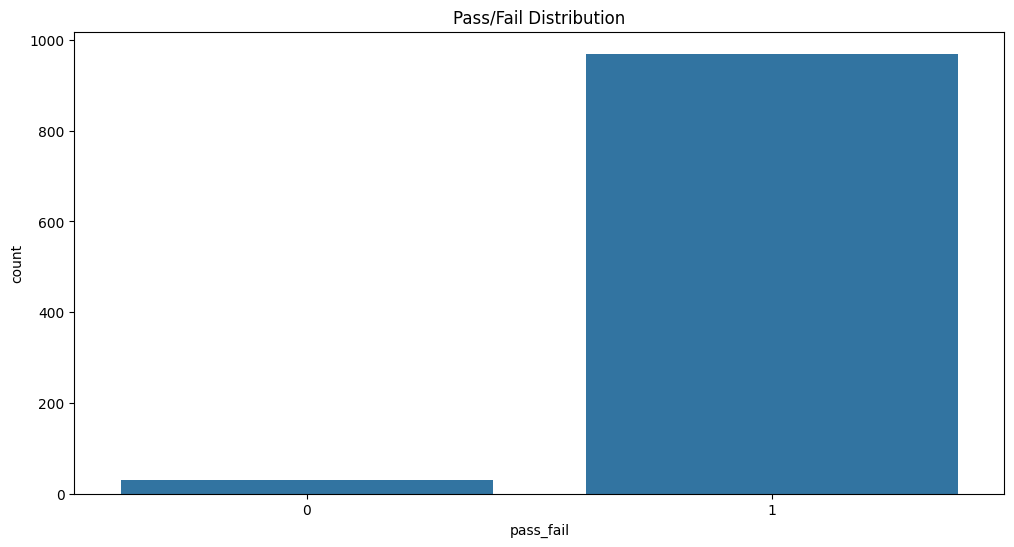

In [ ]:
# Step 2: Exploratory Data Analysis (EDA)
plt.figure(figsize=(12, 6))
sns.countplot(x='pass_fail', data=df)
plt.title("Pass/Fail Distribution")
plt.show()

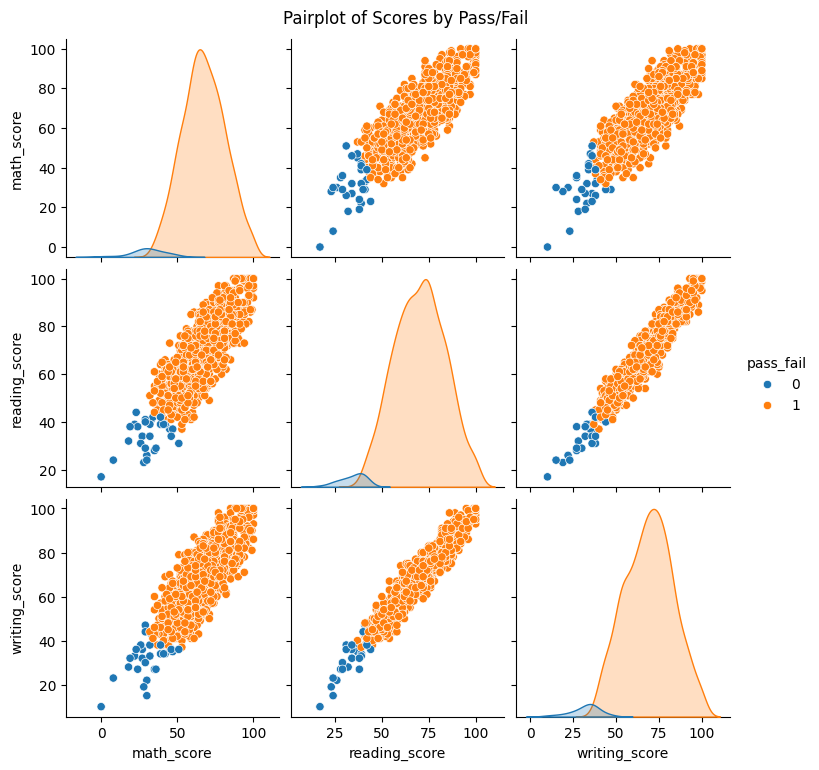

In [ ]:
sns.pairplot(df[['math_score', 'reading_score', 'writing_score', 'pass_fail']], hue='pass_fail')
plt.suptitle("Pairplot of Scores by Pass/Fail", y=1.02)
plt.show()

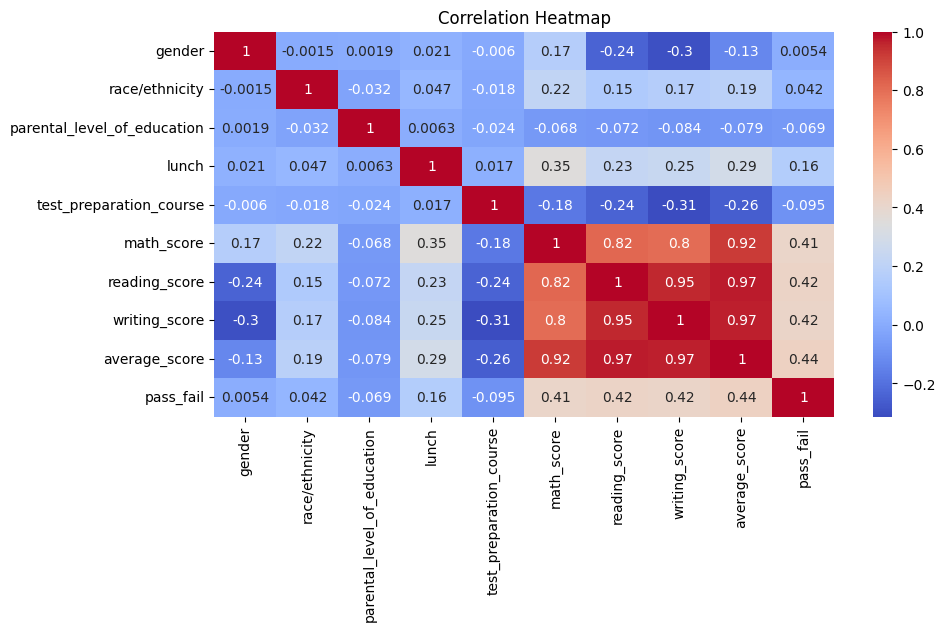

In [ ]:
plt.figure(figsize=(10, 5))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()

# Step 3: Model Training

We now:
- Separate the dataset into features (X) and target (y)
- Split into training and testing sets
- Train two classification models: Logistic Regression and Random Forest


In [ ]:
# Step 3: Train a Model (Logistic Regression or Random Forest)
# Features and target
X = df.drop(["average_score", "pass_fail"], axis=1)
y = df["pass_fail"]

In [ ]:
# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
# Logistic Regression
logreg = LogisticRegression(max_iter=1000)
logreg.fit(X_train, y_train)
y_pred_logreg = logreg.predict(X_test)

In [ ]:
# Random Forest Classifier
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)

# Step 4: Model Evaluation

Finally, we evaluate the trained models using:
- Accuracy Score
- F1 Score
- Confusion Matrix
- Classification Report


In [ ]:
# Step 4: Evaluate the Models
print("Logistic Regression Performance:")
print("Accuracy: {:.4f}".format(accuracy_score(y_test, y_pred_logreg)))
print("F1 Score: {:.4f}".format(f1_score(y_test, y_pred_logreg)))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_logreg))
print(classification_report(y_test, y_pred_logreg, digits=4))

Logistic Regression Performance:
Accuracy: 1.0000
F1 Score: 1.0000
Confusion Matrix:
 [[ 10   0]
 [  0 190]]
              precision    recall  f1-score   support

           0     1.0000    1.0000    1.0000        10
           1     1.0000    1.0000    1.0000       190

    accuracy                         1.0000       200
   macro avg     1.0000    1.0000    1.0000       200
weighted avg     1.0000    1.0000    1.0000       200



In [ ]:
print("\nRandom Forest Performance:")
print("Accuracy: {:.4f}".format(accuracy_score(y_test, y_pred_rf)))
print("F1 Score: {:.4f}".format(f1_score(y_test, y_pred_rf)))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_rf))
print(classification_report(y_test, y_pred_rf, digits=4))


Random Forest Performance:
Accuracy: 1.0000
F1 Score: 1.0000
Confusion Matrix:
 [[ 10   0]
 [  0 190]]
              precision    recall  f1-score   support

           0     1.0000    1.0000    1.0000        10
           1     1.0000    1.0000    1.0000       190

    accuracy                         1.0000       200
   macro avg     1.0000    1.0000    1.0000       200
weighted avg     1.0000    1.0000    1.0000       200



# Model Testing

In [ ]:
# Step 6: Test with User Input

def get_user_input():
    print("\nEnter the following student details:")

    gender = input("Gender (0 for female, 1 for male): ")
    race_ethnicity = input("Race/Ethnicity (0 to 4): ")
    parental_education = input("Parental level of education (0 to 5): ")
    lunch = input("Lunch (0 for free/reduced, 1 for standard): ")
    test_prep = input("Test preparation course (0 for none, 1 for completed): ")
    math_score = float(input("Math score (0-100): "))
    reading_score = float(input("Reading score (0-100): "))
    writing_score = float(input("Writing score (0-100): "))

    # Create a DataFrame for the new sample
    sample = pd.DataFrame({
        'gender': [int(gender)],
        'race/ethnicity': [int(race_ethnicity)],
        'parental_level_of_education': [int(parental_education)],
        'lunch': [int(lunch)],
        'test_preparation_course': [int(test_prep)],
        'math_score': [math_score],
        'reading_score': [reading_score],
        'writing_score': [writing_score]
    })

    return sample

# Get input from user
user_input = get_user_input()

# Predict using both models
log_pred = logreg.predict(user_input)[0]
rf_pred = rf.predict(user_input)[0]

# Show predictions
print("\n Prediction Results:")
print(f"Logistic Regression Prediction: {'Pass' if log_pred == 1 else 'Fail'}")
print(f"Random Forest Prediction: {'Pass' if rf_pred == 1 else 'Fail'}")



Enter the following student details:
Gender (0 for female, 1 for male): 1
Race/Ethnicity (0 to 4): 4
Parental level of education (0 to 5): 3
Lunch (0 for free/reduced, 1 for standard): 1
Test preparation course (0 for none, 1 for completed): 1
Math score (0-100): 23
Reading score (0-100): 12
Writing score (0-100): 12

 Prediction Results:
Logistic Regression Prediction: Fail
Random Forest Prediction: Fail
